# Swasthik
# MITE

# calcHist()

OpenCV comes with an in-built cv2.calchist function for histogram: So, it's time to look into the specific parameters related to the
cv2.calchist() function.

hist = cv2.calchist(images, channels, mask, histSize, ranges, hist, accumulate]])
In the code, we used: hist = cv2.calcHist([gray_img].[0].None,[256].[0.256])

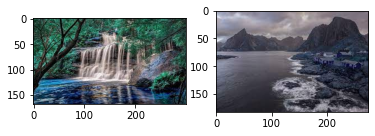

In [2]:
import cv2
from matplotlib import pyplot as plt
#lets read two high and low contrast images

high = cv2.imread('hc1.jfif')
low = cv2.imread('lc1.jfif')

plt.subplot(121), plt.imshow(high)
plt.subplot(122), plt.imshow(low)
plt.show()

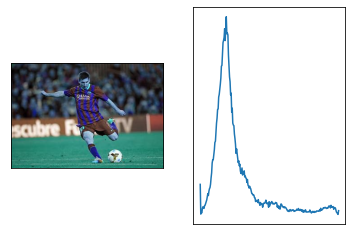

In [9]:
import cv2
from matplotlib import pyplot as plt

high = cv2.imread('messi.jfif',1)
high_hist = cv2.calcHist([high],[0],None,[256],[0,256])
low_hist = cv2.calcHist([low],[0],None,[256],[0,256])


plt.figure()
plt.subplot(121)
plt.imshow(high,cmap='gray')
plt.xticks([]),plt.yticks([])

#histogram of images
plt.subplot(122)
plt.plot(high_hist)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

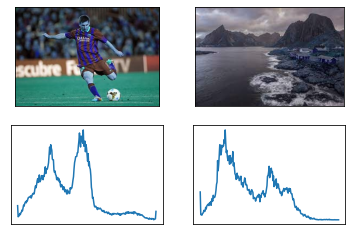

In [18]:
import cv2
from matplotlib import pyplot as plt

hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

#comput the results with histogram
plt.figure()
plt.subplot(221), plt.imshow(high,cmap='gray')
plt.grid(False),plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(low, cmap='gray')
plt.grid(False),plt.xticks([]), plt.yticks([])

#histogram of images
plt.subplot(223), plt.plot(hist_high)
plt.grid(False),plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(low_hist)
plt.grid(False),plt.xticks([]), plt.yticks([])
plt.show()

# Application of Mask using OpenCV

We used cv.calchist() to find the histogram of the full image. What if you want to find histograms of some regions of an image? Just create a mask image with white color on the region you want to find histogram and black otherwise. Then pass this as the mask

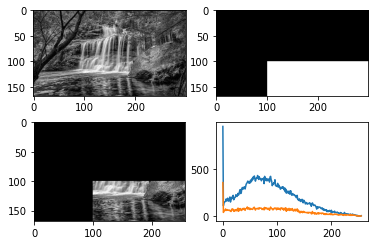

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('hc1.jfif',0)
# create a mask
mask2= np.zeros(img.shape[:2], np.uint8)
mask2[100:200, 100:300] = 255
masked_img= cv2.bitwise_and(img,img,mask = mask2)

#Calculate histogram with mask and without mask 
#Check third argument for mask

hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask2,[256],[0,256])
plt.subplot(221), plt.imshow(img, "gray")
plt.subplot(222), plt.imshow(mask2, "gray")
plt.subplot(223), plt.imshow(masked_img, "gray")
plt.xlim([0,256])
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.show()

# NumPy - np.histogram()

NumPy also provides us a function for histogram, np.histogram(). So, we can use NumPy fucntion instead of OpenCV function:


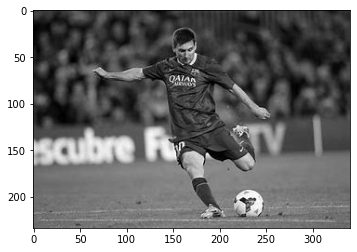

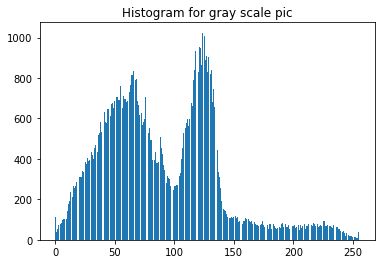

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

gray_img = cv2.imread("messi.jfif", cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img, cmap='gray')
plt.show()

hist,bins = np.histogram(gray_img,256,[0,256])

plt.bar(range(0, 256), hist)

plt.title("Histogram for gray scale pic")
plt.show()

# Numpy- np.bincount

Numpy has another function, np.bincount() which is much faster than (around 10X) np.histogram(). So for one-dimensional histograms, you can better try that. Don't forget to set minlength=256 in np.bincount.
For example, hist= np.bincount(img.ravel(),minlength=256)
OpenCV function is faster than (around 40X) than np.histogram(). So stick with OpenCV function.

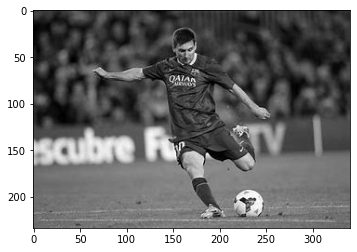

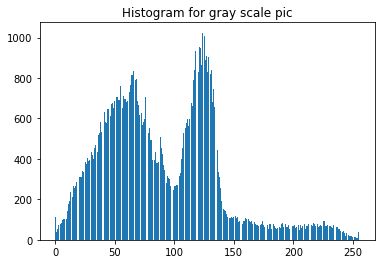

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

gray_img = cv2.imread("messi.jfif", cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img, cmap='gray')
plt.show()

hist = np.bincount(gray_img.ravel(),minlength=256)

plt.bar(range(0, 256), hist)

plt.title("Histogram for gray scale pic")
plt.show()

# CPU Processing time comparision of Histogram computing Methods

0.0
0.0010046958923339844
0.0039861202239990234


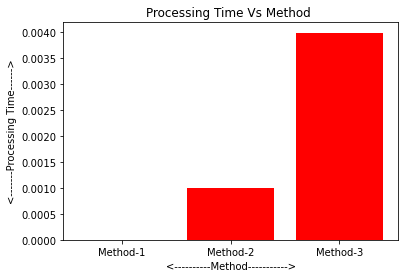

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

#Read input image

gray_ing = cv2.imread('hist_highkey.jpg', cv2. IMREAD_GRAYSCALE)

#Method-1

t10 = time.time()
t11=time.time()
high_hist_openCV = cv2.calcHist([gray_img], [0], None, [256], [0,256])
time_for_openCV = t11-t10
print(time_for_openCV)

#Method-2: Using CV2 function cv2.COLOR_BGR2GRAY

t20 = time.time()
hist_bincount = np.bincount (gray_img.ravel(), minlength=256)
t21 = time.time()
time_bincount = t21 -t20
print(time_bincount)

#Method-2: Using CV2 function cv2.COLOR_BGR2GRAY

t30 = time.time()
hist_numpy,bins = np.histogram(gray_img,256,[0,256])
t31 = time.time()
time_numpy = t31 -t30
print(time_numpy)

#Comparision of Processing Speed  of above three diffrent forms of implementation
x= ['Method-1', 'Method-2', 'Method-3']
Processing_Times = [time_for_openCV, time_bincount, time_numpy]

# x_pos[i for i, in enumerate(x)] 
x_pos = [i for i in range(len(x))]

#x_pos[i for i, in enumerate(x)]

plt.bar(x_pos, Processing_Times, color="red")
plt.xlabel("<----------Method----------->")
plt.ylabel("<-------Processing Time------>")
plt.title("Processing Time Vs Method ")

plt.xticks(x_pos, x)

plt.show()

# Histogram of color image

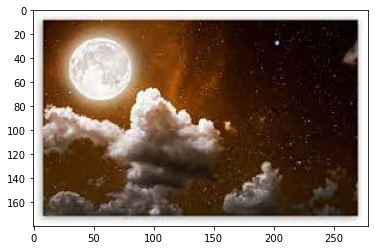

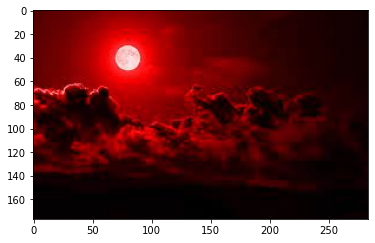

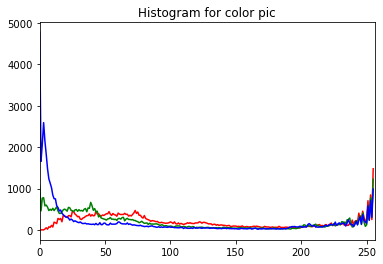

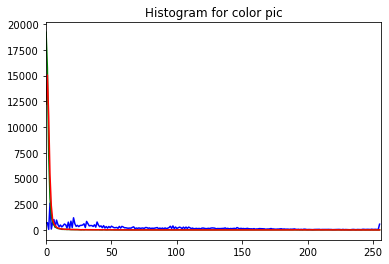

In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

high_img = cv2.imread("img11.jfif")
low_img = cv2.imread("img12.jfif")

plt.imshow(high_img)
plt.show()

plt.imshow(low_img)
plt.show()

#Histogram of high contrast image
color =('r','g','b')
for channel,col in enumerate(color):
    histr = cv2.calcHist([high_img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color pic')
plt.show()

#Histogram of high contrast image
color =('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([low_img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color pic')
plt.show()


# Method 1: Image Histogram from scratch

In [34]:
def get_histogram(image, low=0, high=255, num_bins=255, normalized=False): 
    
    bins = np.linspace (low, high, num_bins+1)
    hist = np.zeros(num_bins, dtype='int64')
    
    # Feel free to try different versions 
    for k in range(num_bins): 
        hist[k] = np.sum(((image >= bins [k])*(image < bins [k+1]))*1)
        if k == num_bins-1: 
            hist[k] = np.sum(((image >= bins [k])*(image <= bins [k+1]))*1) 
    if normalized: 
        # We assume uniform bin size 
        bin_size = bins [1]- bins [0] 
        # Normalized now means that the sum of elements in the unnormalized 
        # histogram times the bin size should equal 1, therefore 
        hist = hist / (np.sum(hist) * bin_size) 
 
    # Check with numpy version 
    np_hist, np_bins = np.histogram(image.flatten(), bins-num_bins, range=[low, high], density=normalized) 
    for k, in enumerate(hist): 
        # Float comparison 
        assert np.isclose (hist[k], np_hist[k]), 'Something wrong in index ' + str(k) 
    return bins, hist 

# Image Information

Find, image data type, minimum intesity value, maximum intesity value, mean and standard deviation of image

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#example 2
#histogram of low contrasst image
im = cv2.imread('lc1.jfif', cv2.IMREAD_GRAYSCALE)
print('Image info:')
print('Data type:',im.dtype)
print('Min intensity value:',im.min())
print('Max intensity value:',im.max())
print('Mean: ', np.mean(im))
print('Standard deviation: ', np.std(im))

Image info:
Data type: uint8
Min intensity value: 0
Max intensity value: 252
Mean:  90.85313462493791
Standard deviation:  45.45821411321499


# 2-Cumulative histogram of an image

Calculate cumulative distribution function (CDF) of an image

The cumulative histogram of an image is produced by calculating the cumulative sum of that image's histogram. There is no specific function in OpenCV to obtain the CDF of an image; thus we use the cumsum function in Numpy. 

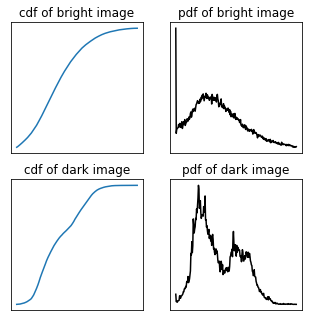

In [67]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

high = cv2.imread('hc1.jfif',0) 
low = cv2.imread('lc1.jfif',0)

#Compare histograms of high and Low contrast images
hist_high, _= np.histogram(high, bins=256, range=(0, 256))
hist_low,_= np.histogram(low, bins=256, range=(0, 256))

cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

#plot cumulative histograms

plt.subplot(221), plt.plot(cdf_high), plt.title( 'cdf of bright image')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('pdf of bright image')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of dark image')
plt.grid(False),plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('pdf of dark image')
plt.grid(False), plt.xticks([]), plt.yticks([]) 

#adjust the placement of subplots
plt.subplots_adjust(bottom=2, right=0.8, top=3)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

# 3-Histogram manipulation 
In order to continue image manipulation, first of all, we change the RGB images to grayscale using cv2.cvtColor(). 

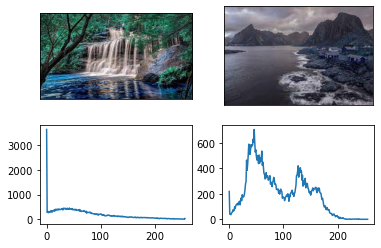

In [4]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

high_gray = cv2.imread('hc1.jfif',1)
low_gray = cv2.imread('lc1.jfif',-1) 

# show images and their histograms 
plt.subplot(221), plt.imshow(high_gray, cmap='gray') 
plt.grid(False), plt.xticks([]), plt.yticks([]) 

plt.subplot(223), plt.plot(cv2.calcHist([high_gray], [0], None, [256], [0,256])) 
plt.subplot(222), plt.imshow(low_gray, cmap='gray') 
plt.grid(False), plt.xticks([]), plt.yticks([]) 
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0], None, [256],[0,256])) 
plt.show()

# 3-1 Brightness 
In order to change the brightness and contrast of an image, two parameters are often used as a and ẞ for contrast and brightness,respectively. 

g(i,j) = a⋅ f(i, j) +ß 

manip_image(image, alpha, beta) function gets a and ẞ and produces the output image. 


In [7]:
# Define a function to easily handle manipulation. 
def manip_image (image, alpha, beta): 
    new_image = np.zeros(image.shape, image.dtype) 
    for x in range(image.shape[0]): 
        for y in range(image.shape[1]): 
            new_image[x,y] = np.clip(alpha*image [x,y] + beta, 0, 255) 
    return new_image 
 


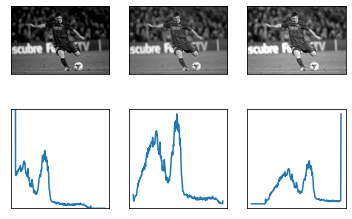

In [13]:
# Test on the image 
img = cv2.imread('messi.jfif',0) 

bright = manip_image (img, 1, 40) 
dark = manip_image (img, 1, -40) 
# Compare the results messi.jfif
# brightness value(beta) =40 # brightness value(beta) =-40 
img= cv2.imread('messi.jfif',0)
plt.figure() 
plt.subplot(231), plt.imshow(dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([]) 
plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([]) 
plt.subplot(233), plt.imshow(bright, cmap='gray') 
plt.grid(False), plt.xticks([]), plt.yticks([]) 
plt.subplot(234) 
plt.plot(cv2.calcHist([dark],[0], None, [256], [0,256])), plt.ylim((0, 1750))
plt.grid(False), plt.xticks([]), plt.yticks([]) 
plt.subplot(235) 
plt.plot(cv2.calcHist([img], [0], None, [256], [0,256]))
plt.grid(False), plt.xticks([]), plt.yticks([]) 
plt.subplot(236) 
 
plt.plot(cv2.calcHist([bright],[0],None, [256], [0,256]))
plt.grid(False), plt.xticks([]),plt.yticks([])
plt.show() 

# Linear transformation from scratch 


In [38]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Histogram of low contrast image 
im = cv2.imread('hc1.jfif',cv2.IMREAD_GRAYSCALE) 
bins, hist_im = get_histogram(im) 
print('Input image info:') 
print('Data type: ', im.dtype) 
print('Min intensity value: ', im.min()) 
print('Max intensity value: ', im.max()) 
print('Mean: ', np.mean (im)) 

print('Standard deviation: ',np.std(im))
plt.figure(0)

plt.imshow(im, cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.figure(1) 
plt.bar(range(0,255), hist_im) 
# plt.bar(bins[:-1], hist_im) plt.show() 

# Linear Transformation 
target_mean = 120 
target_stddev = 20 
input_mean = np.mean (im) 
input_stddev = np.std(im) 

a = target_stddev / input_stddev  
b = target_mean -- a *input_mean 
# Perform the transformation 
transformed_im= b + a *im 

# Cut the image values < and > 255 
transformed_im= transformed_im-transformed_im* (transformed_im< 0) 
transformed_im*(transformed_im < 0) - transformed_im*(transformed_im > 255) 
bins, hist = get_histogram(transformed_im) 

# Display result 
plt.figure(3) 
plt.imshow(transformed_im, cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 


ValueError: too many values to unpack (expected 1)

# Method 1: Linear Contrast Stretching method

(168, 299)
(168, 299)


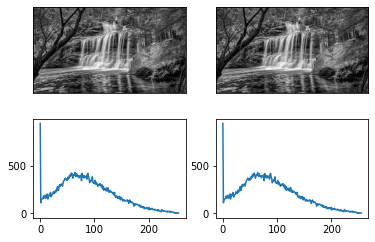

In [46]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 


img = cv2.imread('hc1.jfif',0)
print(img.shape) 
# Linear contrast stretching method 
img_stretch = 255 *((img -img.min())/(img.max()-img.min())) 
# # cast image back to uint8 since we can't use floating point values in images 
img_stretch = img_stretch.astype('uint8') 
print(img_stretch.shape) 
# Storing stretched Image 

# Compare the results with histogram 
plt.figure() 
plt.subplot(221), plt.imshow(img, cmap='gray') 
plt.grid(False), plt.xticks([]), plt.yticks([]) 

plt.subplot(222), plt.imshow(img_stretch, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([]) 
plt.subplot(223) 
plt.plot(cv2.calcHist([img], [0], None, [256], [0,256])) 
plt.subplot(224) 
plt.plot(cv2.calcHist([img_stretch],[0], None, [256], [0,256])) 